In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv(r"C:\Users\22213\OneDrive\Desktop\csv\heart_disease_data.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [7]:
x = df.drop(columns=['target'], axis=1)
y = df['target']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, stratify=y, shuffle=True)

In [22]:
model = LogisticRegression(solver='lbfgs', max_iter=500)

In [23]:
model.fit(x,y)

c:\Users\22213\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

**Accuracy score**

In [24]:
# training data accuracy score
training_pred = model.predict(x_train)
training_accuracy_pred = accuracy_score(y_true=y_train, y_pred=training_pred)
print('Training data accuracy score:', training_accuracy_pred)

Training data accuracy score: 0.8553719008264463


In [25]:
# test data accuracy score
test_pred = model.predict(x_test)
test_accuracy_pred = accuracy_score(y_true=y_test, y_pred=test_pred)
print('Test data accuracy score:', test_accuracy_pred)

Test data accuracy score: 0.8688524590163934


**Confusion matrix**

Confusion matrix on training data: [[ 87  23]
 [ 12 120]]


<Axes: >

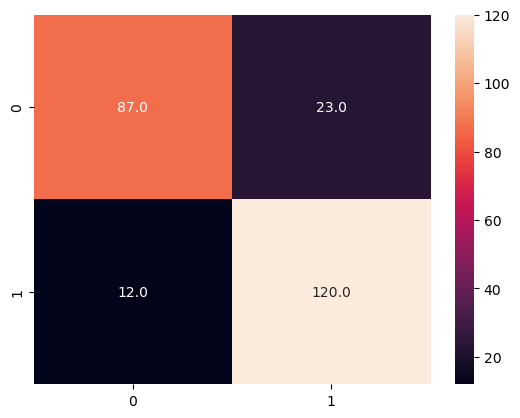

In [26]:
# confusion matrix on training data
cf_matrix = confusion_matrix(y_pred=training_pred, y_true=y_train)
print('Confusion matrix on training data:', cf_matrix)
sns.heatmap(cf_matrix, annot=True, fmt='.1f')

Confusion matrix on test data: [[21  7]
 [ 1 32]]


<Axes: >

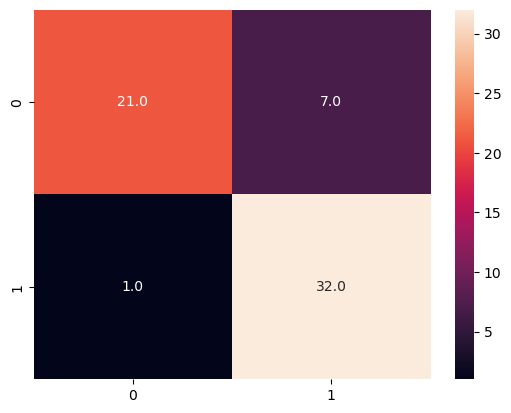

In [27]:
# confusion matrix on test data
cf_matrix_test = confusion_matrix(y_pred=test_pred, y_true=y_test)
print('Confusion matrix on test data:', cf_matrix_test)
sns.heatmap(cf_matrix_test, annot=True, fmt='.1f')

**Precision**

In [28]:
# training data precision
trainig_precision = precision_score(training_pred, y_train)
print('Training data precision:', trainig_precision)

Training data precision: 0.9090909090909091


In [29]:
# test data precision
test_precision = precision_score(test_pred, y_test)
print('Test data precision:', test_precision)

Test data precision: 0.9696969696969697


**Recall**

In [30]:
# training data recal
trainig_recall = recall_score(training_pred, y_train)
print('Training data recall:', trainig_recall)

Training data recall: 0.8391608391608392


In [31]:
# test data recal
test_recall = recall_score(test_pred, y_test)
print('Test data recall:', test_recall)

Test data recall: 0.8205128205128205


**f1_score**

In [32]:
# training data f1 score
f1_training = f1_score(training_pred, y_train)
print('Trainig data f1_score',f1_training)

Trainig data f1_score 0.8727272727272727


In [33]:
# test data f1 score
f1_test = f1_score(test_pred, y_test)
print('Test data f1_score',f1_test)

Test data f1_score 0.8888888888888888
